In [1]:
# Libraries for reading and handling the data
import numpy as np
import pandas
import re

# Libraries for data visualization
import matplotlib.pyplot as plt
import seaborn 

# Libraries for data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin

# Libraries for creating ML model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Library for Analysing the ML model
from sklearn import metrics

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm

fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()


The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [3]:
df = pandas.read_csv('realfinal.csv')


from sklearn import preprocessing    

label_encoder = preprocessing.LabelEncoder()     # label encoder 생성

onehot_location = label_encoder.fit_transform(df['RMax_Power'])

df['y_label'] = onehot_location

df['Direct_X'] = df['Direct_X'].astype('int64')
df['Direct_X'] = df['Direct_X'].astype('object')

onehot_in = pandas.get_dummies(df[['Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire']])

df = pandas.concat([df, onehot_in], axis = 1)

df.drop(['Name', 'Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire', 'RMax_Power'], axis = 1, inplace = True) 

X = df[['Core_Speed',	'L2_Cache',	'Memory',	'Memory_Bandwidth',	'Memory_Bus',	'Memory_Speed',	'Open_GL',	'Pixel_Rate',	'Process',	'ROPs',	'Shader',	'TMUs',	'Texture_Rate',	'Direct_X_9',	'Direct_X_10',	'Direct_X_11',	'Direct_X_12',	'Integrated_No',	'Integrated_Yes',	'Manufacturer_AMD',	'Manufacturer_ATI',	'Manufacturer_Intel',	'Manufacturer_Nvidia',	'Memory_Type_DDR',	'Memory_Type_DDR2',	'Memory_Type_DDR3',	'Memory_Type_GDDR2',	'Memory_Type_GDDR3',	'Memory_Type_GDDR4',	'Memory_Type_GDDR5',	'Memory_Type_GDDR5X',	'Memory_Type_HBM-1',	'Memory_Type_HBM-2',	'Memory_Type_eDRAM',	'SLI_Crossfire_No',	'SLI_Crossfire_Yes']]  # 독립변수
y = df['y_label']

In [4]:
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

from tensorflow.keras.utils import  to_categorical

#각 데이터의 레이블 0~9 숫자 값을 범주형 형태로 변경

y = to_categorical(y)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [5]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=777) # 랜덤 추출 값

In [6]:
#훈련 데이터
print(X_train.shape,y_train.shape)
print(y_train)

#테스트 데이터
print(X_test.shape, y_test.shape)
print(y_test)

(1409, 36) (1409, 8)
[[0. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(604, 36) (604, 8)
[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [7]:
from sklearn.model_selection import  train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,             # 독립 변수
                                                   y_train,            # 종속변수
                                                   test_size=0.3,     # 검증 33%
                                                   random_state=777)   # 랜덤 추출 값

In [8]:
print(f'훈련 데이터 {X_train.shape} 레이블 {y_train.shape}')
print(f'검증 데이터 {X_val.shape} 레이블 {y_val.shape}')

훈련 데이터 (986, 36) 레이블 (986, 8)
검증 데이터 (423, 36) 레이블 (423, 8)


In [9]:
import numpy as np
np.set_printoptions(suppress=True)

print(X_train[0])

[ 0.02438634 -0.21744566  0.28166656  0.88311432 -0.13126993  0.53311984
  0.37512859  0.28970644 -0.24805475  0.21457216  0.25314938  0.06040245
  0.71573087 -0.03153617 -0.26167028 -0.32283712  0.43556436  0.03863337
 -0.03863337 -0.70315864 -0.19259876 -0.03153617  0.76243295 -0.0222939
 -0.09761448 -0.42827738 -0.03863337 -0.2250029  -0.03863337  0.59092784
 -0.2007737  -0.0499003  -0.03153617 -0.0222939  -0.6984303   0.6984303 ]


In [10]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(X_val.shape, y_val.shape)
print(X_train.shape, X_val.shape)

(986, 36) (986, 8)
(604, 36) (604, 8)
(423, 36) (423, 8)
(986, 36) (423, 36)


In [11]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (36, )))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(8,activation = 'softmax'))  # 다중분류에서 가장 확률이 높은 하나 값만 가져오기위해서 'softmax' 사용

In [12]:
model.compile(loss='mae',
              optimizer = 'adam',
              metrics =['acc'] ) # 정확도

In [13]:
history = model.fit(X_train,y_train,
                    epochs = 150,
                    validation_data =(X_val,y_val))

Epoch 1/150
31/31 [==============================] - 14s 18ms/step - loss: 0.2041 - acc: 0.3145 - val_loss: 0.1464 - val_acc: 0.6336
Epoch 2/150
31/31 [==============================] - 0s 3ms/step - loss: 0.1309 - acc: 0.6120 - val_loss: 0.0996 - val_acc: 0.6596
Epoch 3/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0976 - acc: 0.6548 - val_loss: 0.0853 - val_acc: 0.6832
Epoch 4/150
31/31 [==============================] - 0s 2ms/step - loss: 0.0844 - acc: 0.6900 - val_loss: 0.0798 - val_acc: 0.6927
Epoch 5/150
31/31 [==============================] - 0s 2ms/step - loss: 0.0798 - acc: 0.6973 - val_loss: 0.0769 - val_acc: 0.7139
Epoch 6/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0800 - acc: 0.6980 - val_loss: 0.0752 - val_acc: 0.7069
Epoch 7/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0777 - acc: 0.7015 - val_loss: 0.0744 - val_acc: 0.7139
Epoch 8/150
31/31 [==============================] - 0s 3ms/step - loss: 0.0709 -

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


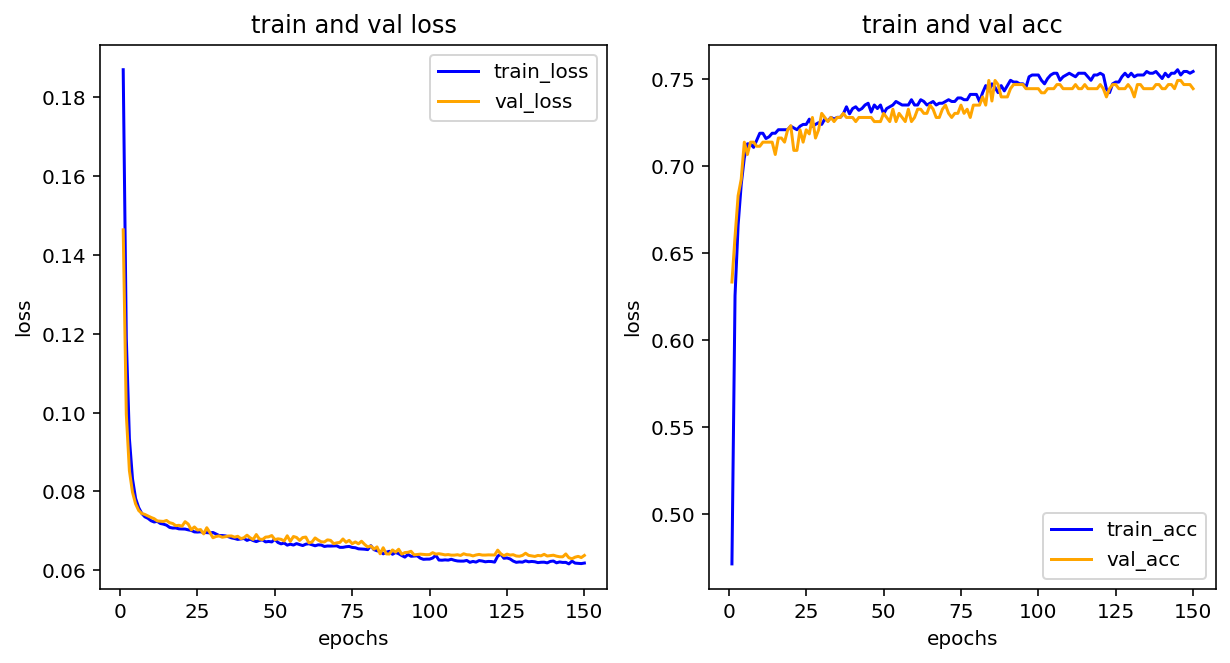

In [14]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss'] # 검증 데이터가 있는 경우 ‘val_’ 수식어가 붙습니다.

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize = (10, 5))

# 훈련 및 검증 손실 그리기
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
ax1.plot(epochs, val_loss, color = 'orange', label = 'val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc = his_dict['acc']
val_acc = his_dict['val_acc']

# 훈련 및 검증 정확도 그리기
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, acc, color = 'blue', label = 'train_acc')
ax2.plot(epochs, val_acc, color = 'orange', label = 'val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel('epochs')
ax2.set_ylabel('loss')
ax2.legend()

plt.show() # loss 값이 손실 값이고 정답률 높은데 오답률은 줄어들고 2 정확도가 

In [15]:
import numpy as np
np.set_printoptions(suppress=True)

results = model.predict(X_test)
print(results.shape)
np.set_printoptions(precision=7) # numpy 소수점 제한
print(f'각 클래스에 속할 확률 : \n{results[0]}')

(604, 8)
각 클래스에 속할 확률 : 
[0. 1. 0. 0. 0. 0. 0. 0.]


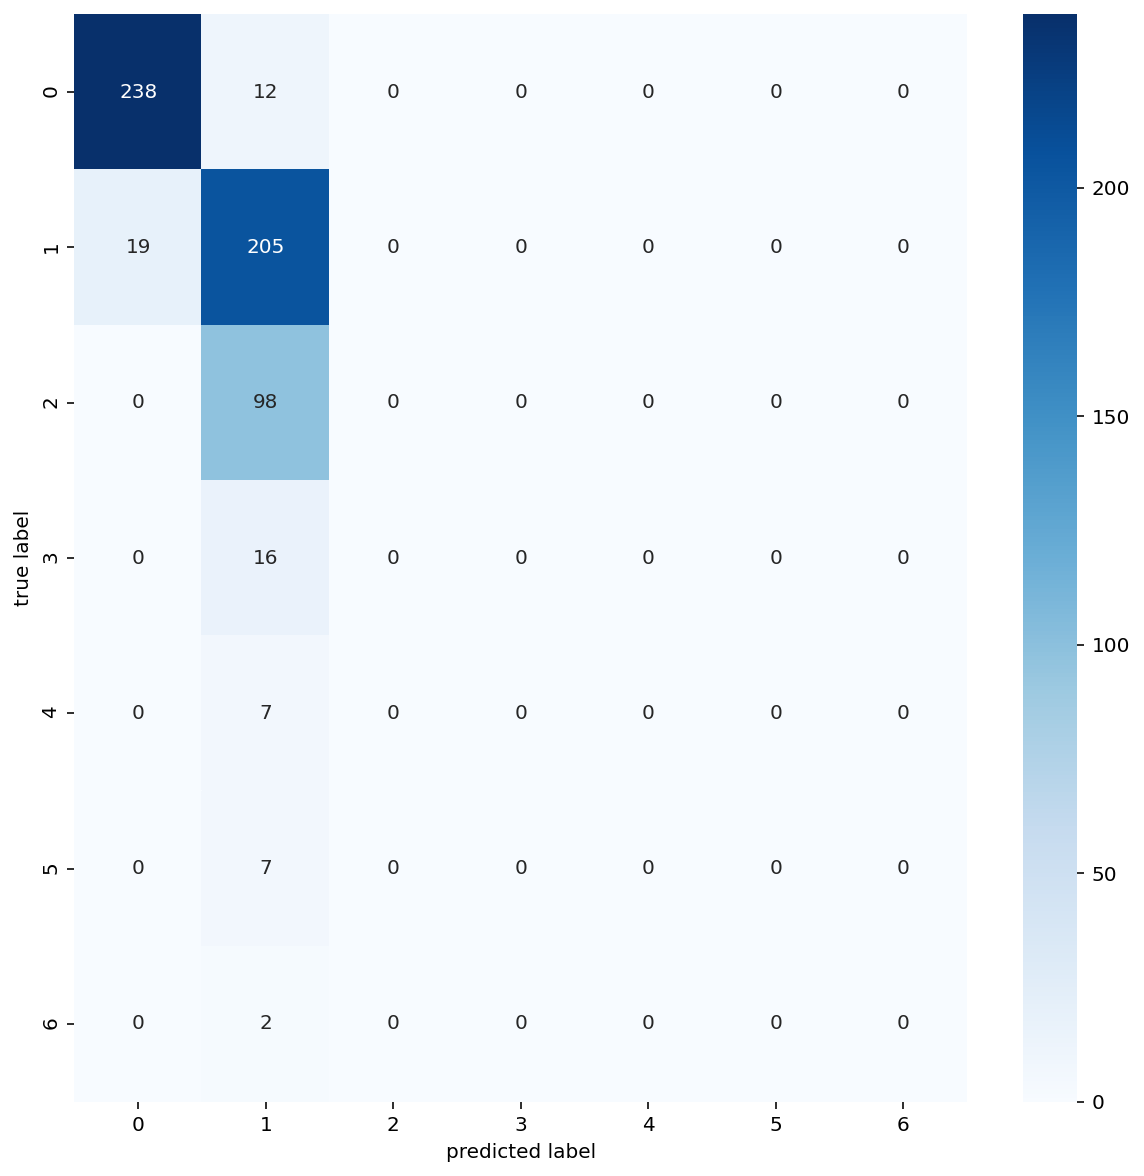

In [16]:
# sklearn.metrics 모듈은 여러가지 평가 지표에 관한 기능을 제공합니다.
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 혼동 행렬을 만듭니다.
plt.figure(figsize = (10, 10))
cm = confusion_matrix(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1))
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('predicted label')
plt.ylabel('true label')
plt.show()

In [17]:
print('\n', classification_report(np.argmax(y_test, axis = -1), np.argmax(results, axis = -1)))


               precision    recall  f1-score   support

           0       0.93      0.95      0.94       250
           1       0.59      0.92      0.72       224
           2       0.00      0.00      0.00        98
           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00         7
           5       0.00      0.00      0.00         7
           7       0.00      0.00      0.00         2

    accuracy                           0.73       604
   macro avg       0.22      0.27      0.24       604
weighted avg       0.60      0.73      0.65       604



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [18]:
# 회귀 분석
df = pandas.read_csv('realfinal.csv')

df['Direct_X'] = df['Direct_X'].astype('int64')
df['Direct_X'] = df['Direct_X'].astype('object')

onehot_in = pandas.get_dummies(df[['Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire']])

df = pandas.concat([df, onehot_in], axis = 1)

df.drop(['Name', 'Direct_X', 'Integrated', 'Manufacturer', 'Memory_Type', 'SLI_Crossfire', 'RMax_Power'], axis = 1, inplace = True) 

X = df[['Core_Speed',	'L2_Cache',	'Memory',	'Memory_Bandwidth',	'Memory_Bus',	'Memory_Speed',	'Open_GL',	'Pixel_Rate',	'Process',	'ROPs',	'Shader',	'TMUs',	'Texture_Rate',	'Direct_X_9',	'Direct_X_10',	'Direct_X_11',	'Direct_X_12',	'Integrated_No',	'Integrated_Yes',	'Manufacturer_AMD',	'Manufacturer_ATI',	'Manufacturer_Intel',	'Manufacturer_Nvidia',	'Memory_Type_DDR',	'Memory_Type_DDR2',	'Memory_Type_DDR3',	'Memory_Type_GDDR2',	'Memory_Type_GDDR3',	'Memory_Type_GDDR4',	'Memory_Type_GDDR5',	'Memory_Type_GDDR5X',	'Memory_Type_HBM-1',	'Memory_Type_HBM-2',	'Memory_Type_eDRAM',	'SLI_Crossfire_No',	'SLI_Crossfire_Yes']]  # 독립변수
y = df['Max_Power']

In [19]:
# 숫자의 수와 차이가 크기 때문에 정규화 작업이 필요합니다. 
from sklearn import preprocessing

X = preprocessing.StandardScaler().fit(X).transform(X)

# 검증 데이터셋을 만듭니다
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.3, random_state=777) # 랜덤 추출 값

# 검증 데이터셋을 만듭니다
from sklearn.model_selection import  train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train,             # 독립 변수
                                                   y_train,            # 종속변수
                                                   test_size=0.3,     # 검증 33%
                                                   random_state=777)   # 랜덤 추출 값


import numpy as np
np.set_printoptions(suppress=True)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_val=np.array(X_val)
y_val=np.array(y_val)

import numpy as np
np.set_printoptions(suppress=True)

print(X_train[0])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()

model.add(Dense(32, activation='relu', input_shape=(36,)))
model.add(Dense(1))


model.compile(optimizer = 'adam', loss='mse', metrics=['mae', 'mse'])

history = model.fit(X_train, y_train,
                    epochs=300,
                    validation_data = (X_val, y_val))

[ 0.0243863 -0.2174457  0.2816666  0.8831143 -0.1312699  0.5331198
  0.3751286  0.2897064 -0.2480548  0.2145722  0.2531494  0.0604025
  0.7157309 -0.0315362 -0.2616703 -0.3228371  0.4355644  0.0386334
 -0.0386334 -0.7031586 -0.1925988 -0.0315362  0.762433  -0.0222939
 -0.0976145 -0.4282774 -0.0386334 -0.2250029 -0.0386334  0.5909278
 -0.2007737 -0.0499003 -0.0315362 -0.0222939 -0.6984303  0.6984303]
Epoch 1/300
31/31 [==============================] - 1s 9ms/step - loss: 30965.9707 - mae: 142.6776 - mse: 30965.9707 - val_loss: 29710.7559 - val_mae: 143.3917 - val_mse: 29710.7559
Epoch 2/300
31/31 [==============================] - 0s 2ms/step - loss: 30583.2949 - mae: 141.7710 - mse: 30583.2949 - val_loss: 29319.6934 - val_mae: 142.4017 - val_mse: 29319.6934
Epoch 3/300
31/31 [==============================] - 0s 2ms/step - loss: 30085.5430 - mae: 140.5424 - mse: 30085.5430 - val_loss: 28790.7676 - val_mae: 141.0177 - val_mse: 28790.7676
Epoch 4/300
31/31 [=============================

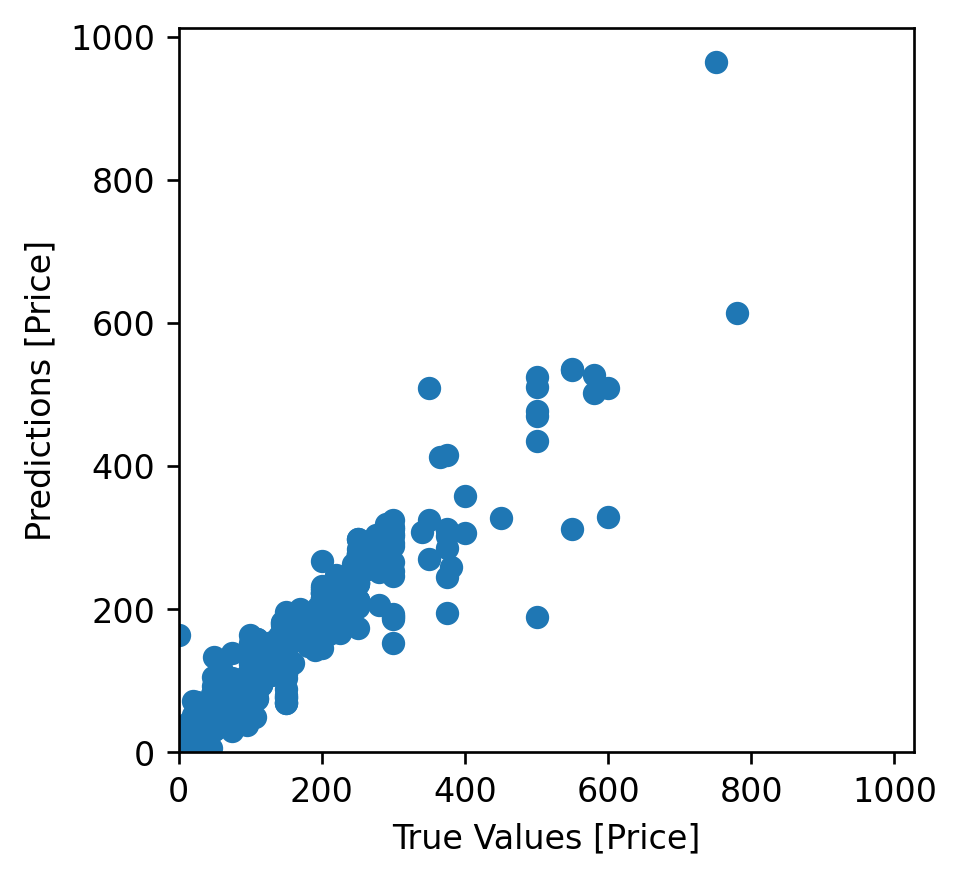

In [20]:
test_predictions = model.predict(X_test).flatten()
plt.figure(dpi = 120)
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [Price]')
plt.ylabel('Predictions [Price]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])